# Prototype

The Prototype Method Design Pattern in Python enables the creation of new objects by cloning existing ones, promoting efficient object creation and reducing overhead.

## Simple Duplication

In [1]:
class Character:
    def __init__(self, name, chara, tex):
        self.name = name
        self.characteristics = chara
        self.texture = tex

    def __str__(self):
        return f"{id(self.name)}:  {id(self.characteristics)}, {id(self.texture)}"

class Texture:
    def __init__(self, texid, file):
        self.id = texid
        self.file = file
        

In [14]:
character1 = Character("character1", {"health": 100, "power": 100, "level":7}, Texture("text1", "file_of_tex1"))
print("address of character1 attributes: ", character1)

character2 = character1
character2.name = "character2"
character2.characteristics["health"] = 90
character2.texture.texid = "text2", 
character2.texture.texid = "file_of_tex2"
print("address of character2 attributes: ", character2)
print("address of character1 attributes: ", character1)

character3 = character1
character3.name = "character3"
character3.characteristics = {"health": 80, "power": 50, "level":5}
character3.texture = Texture("text3", "file_of_tex3")
print("address of character3 attributes: ", character3)
print("address of character1 attributes: ", character1)

address of character1 attributes:  140353617127024:  140353594169536, 140353597739856
address of character2 attributes:  140353593666352:  140353594169536, 140353597739856
address of character1 attributes:  140353593666352:  140353594169536, 140353597739856
address of character3 attributes:  140353593975856:  140353592191424, 140353596658576
address of character1 attributes:  140353593975856:  140353592191424, 140353596658576


This setup will change the prototyping object as well when adapting the prototyped object. This is not what we want.
We can use deepcopy when making copy of the prototype object. But this will be aprt from our design and user may make error by forgetting doing so.

## Cloning

In [17]:
class CharacterPrototype:
    def __init__(self, name, chara={}, tex=None):
        self.name = name
        self.characteristics = chara
        self.texture = tex

    def clone(self):
        return copy.deepcopy(self)

    def __str__(self):
        return f"character: {self.name}, health: {self.characteristics["health"]}"
        

In [18]:
character1 = CharacterPrototype("monster", {"health": 80, "power": 50, "level":5})
character2 = character1.clone()
character2.name = "ogre"

print(f"character1 address: {id(character1)}, character2 address: {id(character2)}")
print(character1)
print(character2)

character1 address: 140353617246400, character2 address: 140353607178576
character: monster, health: 80
character: ogre, health: 80


## dedicated prototype

Sometimes, it is hard or impossible to change the legacy code for cloning. So we can use class dedicated to cloning the prototype class.

In [38]:
import copy

class Prototype:
    def __init__(self, obj):
        self.object = obj

    def clone(self):
        obj = copy.deepcopy(self.object)
        return obj
        
class Character:
    def __init__(self, name, health):
        self.name = name
        self.health = health

    def __str__(self):
        return f"character: {self.name}, health: {self.health}"

In [40]:
character1 = Character("monster", 80)
character2 = prototype(character1).clone()
character2.name = "ogre"

print(f"character1 address: {id(character1)}, character2 address: {id(character2)}")
print(character1)
print(character2)

character1 address: 140358189491024, character2 address: 140358190953616
character: monster, health: 80
character: ogre, health: 80


## Prototype Factory

It stores the prototypes and hand out customized copies of said prototypes on demand.

In [33]:
class CharacterFactory:
    player_texture = Texture("tex_player", "file_of_player")
    npc_texture = Texture("tex_npc", "file_of_npc")

    @staticmethod
    def player(name, charac):
        return CharacterFactory.create_character(name, charac, CharacterFactory.player_texture)

    @staticmethod
    def npc(name):
        return CharacterFactory.create_character(name, {"health": 0, "power": 0, "level":0}, CharacterFactory.npc_texture)

    @staticmethod
    def create_character(name, charac, tex):
        tex = copy.deepcopy(tex)
        tex.id = name
        tex.file = "tex_" + name

In [36]:
player = CharacterFactory.player("ninja", {"health": 100, "power": 100, "level":2})
npc = CharacterFactory.npc("cat")

## Using registry

Normorlly there are more than one prototypes. So we can store all prototypes in a registry object and retrive it dynamically when needed.

In [44]:
class Weapon:
    def __init__(self, type_name, power):
        self.type = type_name
        self.power = power

    def __str__(self):
        return f"weapon: {self.type}, health: {self.power}"

class PrototypeRegistry:
    def __init__(self):
        self.objects = {}

    def register(self, identifier, obj):
        """register all objects that will be cloned."""
        self.objects[identifier] = obj

    def unregister(self, identifier):
        del self.objects[identifier]

    def clone(self, identifier, **kwargs):
        """clone the corresponding object and adjust the attributes."""
        try:
            obj = self.objects[identifier]
        except:
            raise ValueError(f"{identifier} was not found.")
        obj_copy = copy.deepcopy(obj)
        obj_copy.__dict__.update(kwargs)
        return obj_copy

In [60]:
# create a weapon object
weapon1 = Weapon("canon", 0.6)

# instantiate prototype
registry = PrototypeRegistry()

# register all clonable objects
registry.register("character", character1)
registry.register("weapon", weapon1)

# clone
character2 = registry.clone("character", name="troll", health=60)
weapon2 = registry.clone("weapon", type="arch", power=0.3)

print(f"character1 address: {id(character1)}, character2 address: {id(character2)}")
print(character1)
print(character2)

print(f"weapon1 address: {id(weapon1)}, weapon2 address: {id(weapon2)}")
print(weapon1)
print(weapon2)

character1 address: 140358189491024, character2 address: 140358094916336
character: monster, health: 80
character: troll, health: 60
weapon1 address: 140358088643712, weapon2 address: 140358189514288
weapon: canon, health: 0.6
weapon: arch, health: 0.3


## A Concrete Example: board game

Inspired by https://en.wikipedia.org/wiki/Prototype_pattern

In [241]:
from enum import Enum
import numpy as np
from abc import abstractmethod

class GameObject(object):
    """
    Interface for game objects.
    """
    @abstractmethod
    def enter(self):
        raise NotImplementedError
    @abstractmethod
    def clone(self):
        return copy.deepcopy(self)
        
class Board(GameObject):
    """
    Board configuration for the game, where we draw game objects.
    """
    class Color(Enum):
        blank = 0
        red = 1
        green = 2
        blue = 3
        black = 4
        white = 5
    color_map = {0: [0, 0, 0], 1: [255, 0, 0], 2: [0, 255, 0], 3: [0, 0, 255], 4: [0, 0, 0], 5: [255, 255, 255]}
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.plan = np.zeros((height, width))
    def clone(self):
        return copy.deepcopy(self)
    def set_color(self, start:list, end:list, color):
        self.plan[start[0]:end[0], start[1]:end[1]] = color.value
    def draw(self):
        image = np.ones((self.height, self.width, 3))
        for c in self.Color:
            image[self.plan==c.value] = self.color_map[c.value]
        return image

class Wall(GameObject):
    """
    Wall
    """
    color = Board.Color.red
    def __init__(self, position, width, length, orientation:str):
        self.position = position
        self.width = width
        self.length = length
        self.orientation = orientation
    def draw(self, board):
        if self.orientation == "vertical":
            end = [self.position[0]+self.length, self.position[1]+self.width]
        elif self.orientation == "horizontal":
            end = [self.position[1]+self.width, self.position[0]+self.length]
        board.set_color(self.position, end, self.color)

class Hole(GameObject):
    """
    Hole is a square
    """
    color = Board.Color.white
    def __init__(self, position, size):
        self.position = position
        self.size = size
    def draw(self, board):
        end = [self.position[0]+self.size, self.position[1]+self.size]
        board.set_color(self.position, end, self.color)

class Room(GameObject):
    """
    Room is a hollow square
    """
    color = Board.Color.blue
    blank = Board.Color.blank
    def __init__(self, position, scale=1.0):
        self.position = position
        self.scale = scale
    def draw(self, board):
        end_ext = [p+item*self.scale for p, item in zip(self.position, [10, 10])]
        position_int = [p+item*self.scale for p, item in zip(self.position, [2, 2])]
        end_int = [p+item*self.scale for p, item in zip(position_int, [6, 6])]
        board.set_color(self.position, end_ext, self.color)
        board.set_color(position_int, end_int, self.blank)

In [242]:
class PlanFactory:
    """
    legacy factory
    """
    @abstractmethod
    def create_board(self, w, h):
        return Board(w, h)
    @abstractmethod
    def create_wall(self, pos, w, h, orientation):
        return Wall(pos, w, h, orientation)
    @abstractmethod
    def create_hole(self, pos, size):
        return Hole(pos, size)
    @abstractmethod
    def create_room(self, pos, scale):
        return Room(pos, scale)

In [243]:
class PlanPrototypeFactory(PlanFactory):
    """
    Prototype factory
    """
    @staticmethod
    def  create_board(w=100, h=100):
        return Board(w, h).clone()
    @staticmethod
    def create_wall(pos=[0,0], w=10, l=10, orientation="horizontal"):
        return Wall(pos, w, l, orientation).clone()
    @staticmethod
    def create_hole(pos=[0,0], size=10):
        return Hole(pos, size).clone()
    @staticmethod
    def create_room(pos=[0,0],scale=1):
        return Room(pos, scale).clone()

In [244]:
import matplotlib.pyplot as plt

class Game:
    def __init__(self):
        self.objects = []
        self.make_board()

    def make_board(self):
        # we use the prototype factory to create objects
        self.plan = PlanPrototypeFactory.create_board(600, 400)
        
        wall_1 = PlanPrototypeFactory.create_wall()
        wall_1.position = [20, 20]
        wall_1.width = 10
        wall_1.length = 200
        self.objects.append(wall_1)
        wall_2 = PlanPrototypeFactory.create_wall()
        wall_2.position = [100, 200]
        wall_2.width = 20
        wall_2.length = 100
        wall_2.orientation = "vertical"
        self.objects.append(wall_2)
        hole_1 = PlanPrototypeFactory.create_hole()
        hole_1.position = [150, 100]
        hole_1.size = 100
        self.objects.append(hole_1)
        hole_2 = PlanPrototypeFactory.create_hole()
        hole_2.position = [50, 200]
        hole_2.size = 80
        self.objects.append(hole_2)
        room = PlanPrototypeFactory.create_room()
        room.position = [300, 400]
        room.scale = 10
        self.objects.append(room)

    def render(self):
        for obj in self.objects:
            obj.draw(self.plan)
        image = self.plan.draw()
        plt.imshow(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


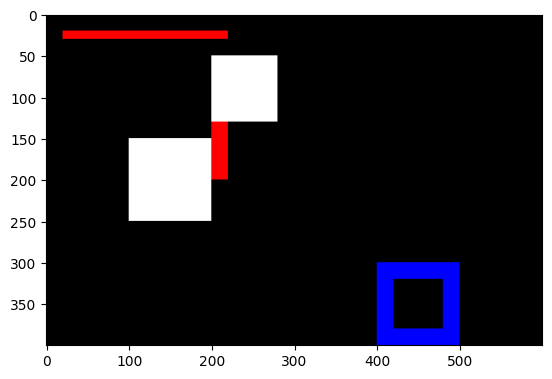

In [245]:
game = Game()
game.render()